# 1. Importing Dataset and cleaning

In [93]:
import pandas as pd

data = pd.read_csv("/content/housing.csv")

data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [110]:
data.describe()

data.shape

data.isnull().any()

data.isna().sum()

data['total_bedrooms']

print(f"{data['total_bedrooms'].mean()}")

data.dropna(inplace=True)

data.isnull().sum()



537.8705525375618


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value',axis=1)
y = data['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

training_set = X_train.join(y_train)
testing_set = X_test.join(y_test)
training_set



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14455,-117.28,32.83,34.0,2392.0,653.0,933.0,619.0,3.7306,NEAR OCEAN,500000.0
12453,-114.57,33.52,27.0,173.0,35.0,117.0,34.0,2.0833,INLAND,45000.0
6925,-118.07,34.01,36.0,1391.0,283.0,1025.0,275.0,3.2375,<1H OCEAN,176800.0
12012,-117.58,33.92,16.0,4157.0,586.0,2036.0,594.0,6.1550,INLAND,246400.0
13963,-116.87,34.24,15.0,4419.0,822.0,622.0,267.0,3.9688,INLAND,182800.0
...,...,...,...,...,...,...,...,...,...,...
1192,-121.54,39.33,27.0,720.0,150.0,359.0,138.0,2.5313,INLAND,61300.0
14782,-117.09,32.57,17.0,444.0,83.0,357.0,87.0,5.1478,NEAR OCEAN,138900.0
2251,-119.81,36.80,38.0,2252.0,325.0,777.0,314.0,6.1575,INLAND,160100.0
6974,-118.04,33.98,28.0,1617.0,507.0,1158.0,486.0,1.9688,<1H OCEAN,165600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

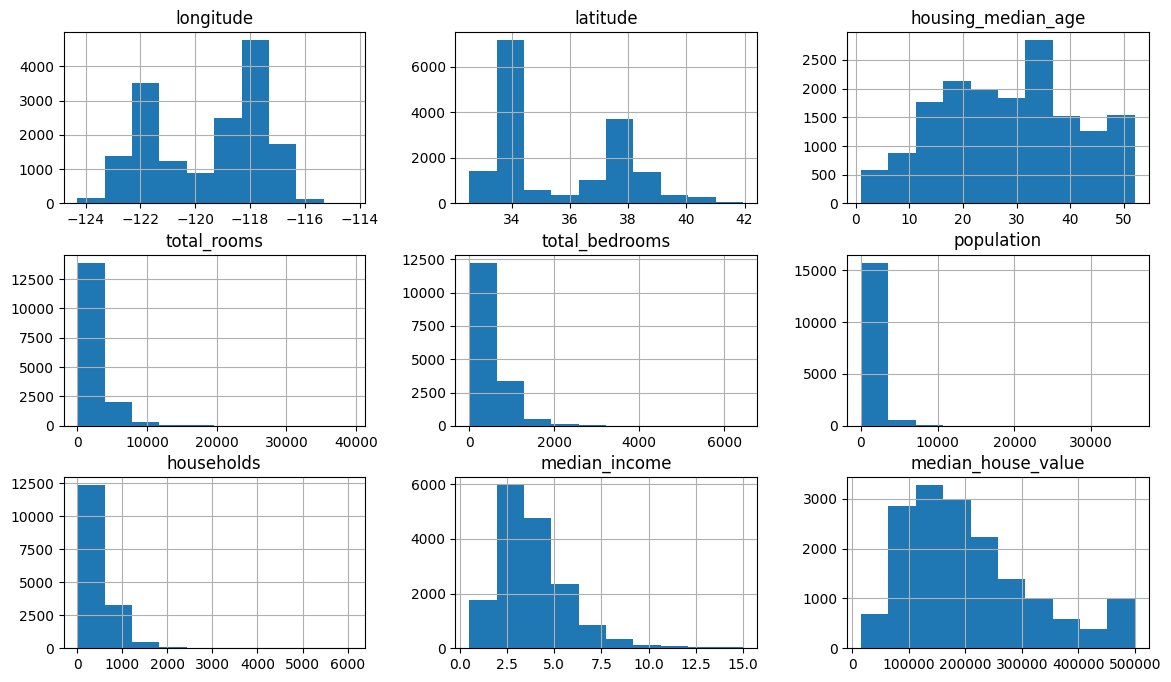

In [112]:
training_set.hist(figsize=(14,8))

<Axes: >

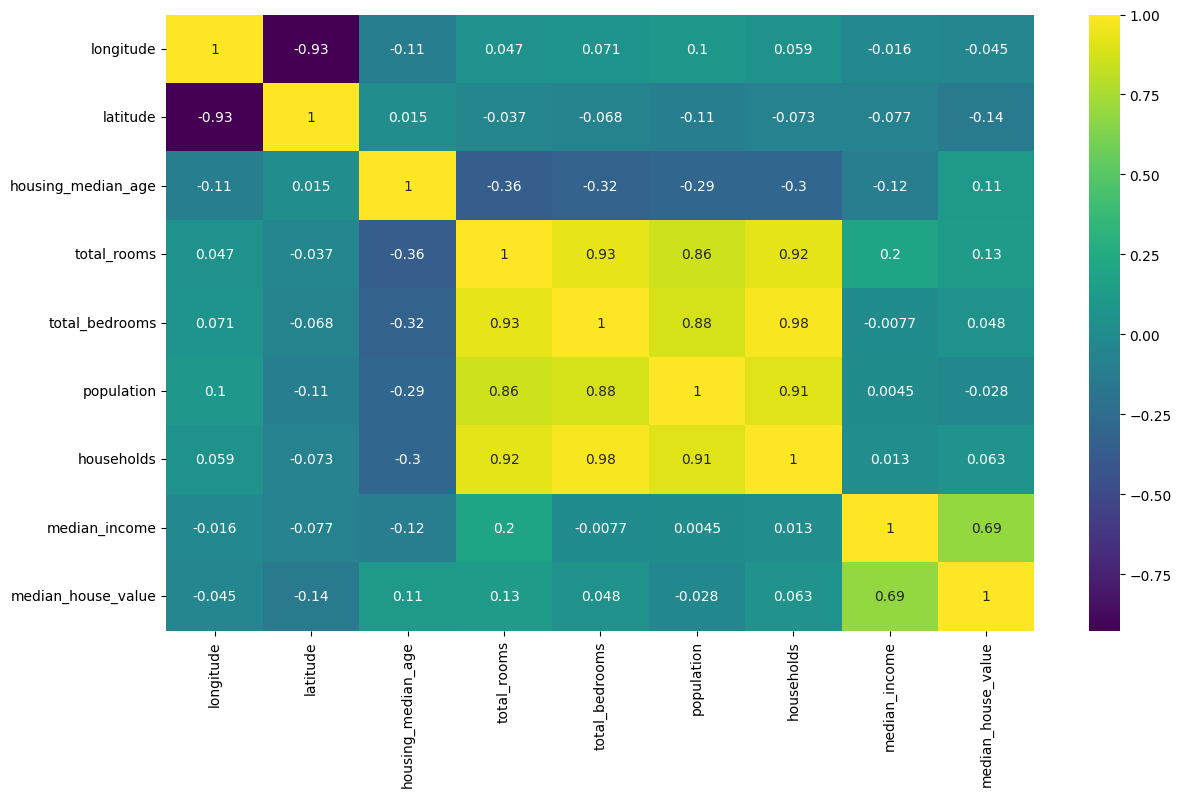

In [113]:
training_set.corr(numeric_only=True)

plt.figure(figsize=(14,8))
sns.heatmap(training_set.corr(numeric_only = True),cmap='viridis',annot=True)

## 1.1 Applying Logarithm Transformations

In [114]:
import numpy as np



training_set['total_rooms'] = np.log(training_set['total_rooms'] + 1 )
training_set['total_bedrooms'] = np.log(training_set['total_bedrooms'] + 1 )
training_set['population'] = np.log(training_set['population'] + 1 )
training_set['households'] = np.log(training_set['households'] + 1 )

abc = pd.get_dummies(training_set['ocean_proximity'],dtype=int)

training_set = training_set.join(abc)



<Axes: xlabel='longitude', ylabel='latitude'>

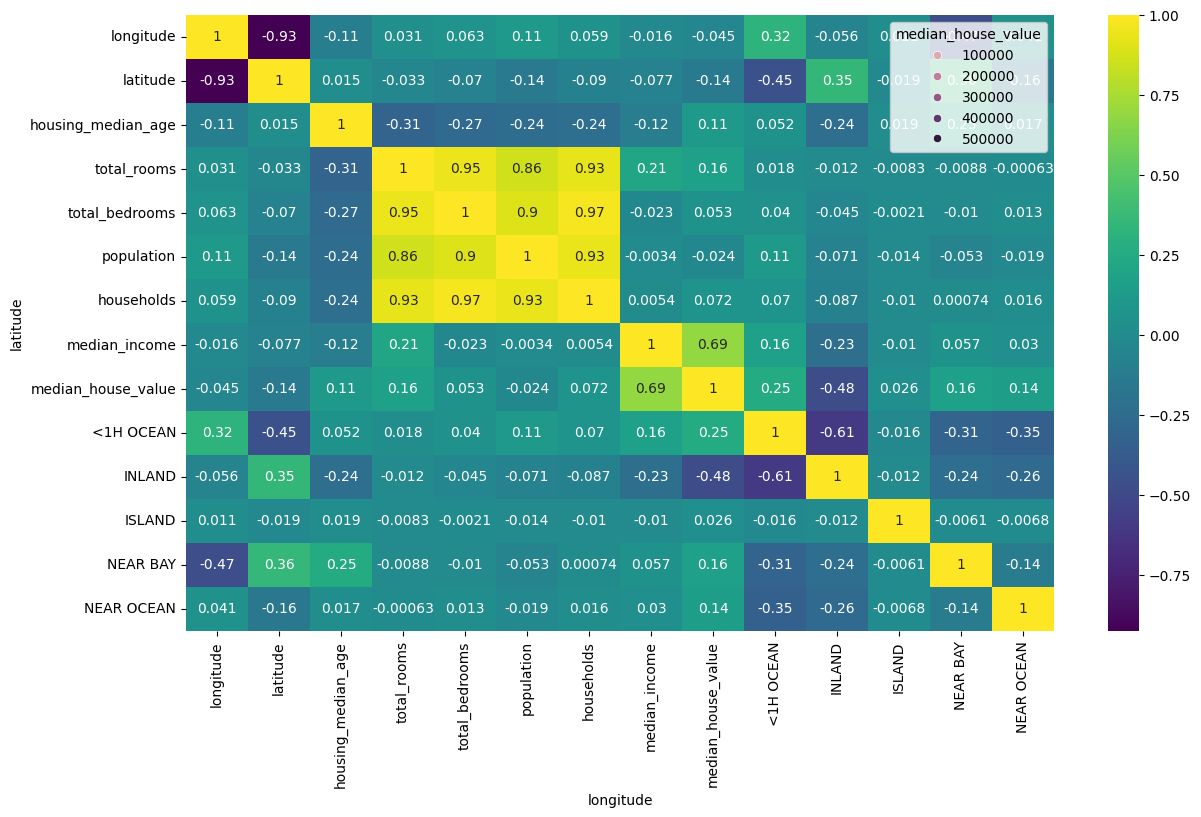

In [115]:
training_set.drop("ocean_proximity",inplace=True,axis=1)

training_set


plt.figure(figsize=(14,8))
sns.heatmap(training_set.corr(),annot=True,cmap='viridis')

sns.scatterplot(data=training_set,x='longitude',y='latitude',hue='median_house_value')

In [116]:
testing_set


testing_set['total_rooms'] = np.log(testing_set['total_rooms'] + 1 )
testing_set['total_bedrooms'] = np.log(testing_set['total_bedrooms'] + 1 )
testing_set['population'] = np.log(testing_set['population'] + 1 )
testing_set['households'] = np.log(testing_set['households'] + 1 )

abc_2 = pd.get_dummies(testing_set['ocean_proximity'],dtype=int)

testing_set = testing_set.join(abc_2)




In [123]:
# testing_set.drop('ocean_proximity',inplace=True,axis=1)

testing_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
18232,-122.11,37.41,27.0,8.539150,7.377759,7.924796,7.301822,3.4198,351900.0,0,0,1,0
12795,-121.46,38.63,26.0,8.066521,6.490724,7.801800,6.440947,1.5600,67600.0,0,1,0,0
19203,-122.72,38.44,52.0,6.966024,5.641907,6.442540,5.613128,1.5357,137500.0,1,0,0,0
15598,-116.35,32.74,16.0,7.861727,6.408529,6.953684,5.908083,1.7137,110700.0,0,1,0,0
7721,-118.11,33.94,32.0,7.649216,5.937536,6.944087,5.955837,5.0258,255400.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,-118.02,33.72,22.0,9.087608,7.442493,8.390496,7.374629,4.4453,267800.0,1,0,0,0
15486,-117.13,33.14,5.0,7.870548,6.291569,7.186144,6.240276,4.1053,171400.0,1,0,0,0
17500,-119.79,34.43,26.0,8.192017,6.335054,7.644919,6.293419,5.1615,276200.0,0,0,0,1
537,-122.30,37.77,42.0,7.620215,5.910797,7.619724,5.874931,2.6447,200000.0,0,0,1,0


# 2. Model

## 2.1 Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression

X_train,y_train = training_set.drop('median_house_value',axis=1) , training_set['median_house_value']

model_2 = LinearRegression()

model_2.fit(X_train,y_train)


X_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14455,-117.28,32.83,34.0,7.780303,6.483107,6.839476,6.429719,3.7306,0,0,0,0,1
12453,-114.57,33.52,27.0,5.159055,3.583519,4.770685,3.555348,2.0833,0,1,0,0,0
6925,-118.07,34.01,36.0,7.238497,5.648974,6.933423,5.620401,3.2375,1,0,0,0,0
12012,-117.58,33.92,16.0,8.332789,6.375025,7.619233,6.388561,6.1550,0,1,0,0,0
13963,-116.87,34.24,15.0,8.393895,6.712956,6.434547,5.590987,3.9688,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,-121.54,39.33,27.0,6.580639,5.017280,5.886104,4.934474,2.5313,0,1,0,0,0
14782,-117.09,32.57,17.0,6.098074,4.430817,5.880533,4.477337,5.1478,0,0,0,0,1
2251,-119.81,36.80,38.0,7.720018,5.786897,6.656727,5.752573,6.1575,0,1,0,0,0
6974,-118.04,33.98,28.0,7.388946,6.230481,7.055313,6.188264,1.9688,1,0,0,0,0


In [150]:
X_test,y_test = testing_set.drop('median_house_value',axis=1) , testing_set['median_house_value']

X_test.insert(10,"ISLAND",0)

prediction_1 = model_2.predict(X_test)



In [151]:
from sklearn.metrics import r2_score

print(f"The r2_score is {r2_score(y_test,prediction_1)}")

The r2_score is 0.663643302456492


2.2 Random Forest Regression

In [155]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()

model_3.fit(X_train,y_train)



RandomForestRegressor()

In [157]:
X_test,y_test = testing_set.drop('median_house_value',axis=1) , testing_set['median_house_value']

X_test.insert(10,"ISLAND",0)

prediction_2 = model_3.predict(X_test)

print(f"The r2_score is {r2_score(y_test,prediction_2)}")

The r2_score is 0.8284619348725955
